In [6]:
import pickle

# 加载数据集
with open('/data/yt/TSCIL/data/saved/HAR_inertial/x_train.pkl', 'rb') as f:
    x_train = pickle.load(f)

with open('/data/yt/TSCIL/data/saved/HAR_inertial/x_test.pkl', 'rb') as f:
    x_test = pickle.load(f)

with open('/data/yt/TSCIL/data/saved/HAR_inertial/state_train.pkl', 'rb') as f:
    state_train = pickle.load(f)

with open('/data/yt/TSCIL/data/saved/HAR_inertial/state_test.pkl', 'rb') as f:
    state_test = pickle.load(f)

# 查看数据集的维度和大小
print(f"x_train 维度: {x_train.shape if hasattr(x_train, 'shape') else '不适用'}，大小: {len(x_train)}")
print(f"x_test 维度: {x_test.shape if hasattr(x_test, 'shape') else '不适用'}，大小: {len(x_test)}")
print(f"state_train 维度: {state_train.shape if hasattr(state_train, 'shape') else '不适用'}，大小: {len(state_train)}")
print(f"state_test 维度: {state_test.shape if hasattr(state_test, 'shape') else '不适用'}，大小: {len(state_test)}")


x_train 维度: (6616, 128, 9)，大小: 6616
x_test 维度: (2947, 128, 9)，大小: 2947
state_train 维度: (6616, 1)，大小: 6616
state_test 维度: (2947, 1)，大小: 2947


In [3]:
import pandas as pd
import os
from shutil import copyfile

def reorder_and_save_dataset(csv_file: str, root_dir: str, save_dir: str, custom_class_order: list[int], dataset_type: str):
    """
    重新排列数据集并保存为不同顺序的CSV文件和相应的图像目录。

    :param csv_file: 原始数据集的CSV文件路径。
    :param root_dir: 原始图像数据集的根目录。
    :param save_dir: 重新排列的数据集保存的根目录。
    :param custom_class_order: 自定义类别顺序的列表。
    :param dataset_type: 数据集类型，'train' 或 'test'。
    """
    # 读取原始数据集
    annotations = pd.read_csv(csv_file)

    # 创建保存目录
    images_save_dir = os.path.join(save_dir, "images")
    if not os.path.exists(images_save_dir):
        os.makedirs(images_save_dir)

    print(f"Processing {dataset_type} dataset with order {custom_class_order} and saving to {save_dir}")

    # 重排序数据集
    reordered_indices = []
    for cls in custom_class_order:
        cls_indices = annotations[annotations.iloc[:, 1] == cls].index.tolist()
        reordered_indices.extend(cls_indices)
    
    reordered_annotations = annotations.iloc[reordered_indices].reset_index(drop=True)

    # 保存重新排列后的CSV文件
    reordered_csv_path = os.path.join(save_dir, f"{dataset_type}_reordered_dataset.csv")
    reordered_annotations.to_csv(reordered_csv_path, index=False)

    # 保存图像到同一个images文件夹中
    for _, row in reordered_annotations.iterrows():
        img_name = f"{row[0]}.jpg"
        src_path = os.path.join(root_dir, img_name)
        dst_path = os.path.join(images_save_dir, img_name)
        if os.path.exists(src_path):
            copyfile(src_path, dst_path)
        else:
            print(f"Image {src_path} not found, skipping.")
                
    print(f"{dataset_type.capitalize()} dataset processed and saved.")

if __name__ == "__main__":
    # 原始训练集和测试集的CSV文件路径
    original_train_csv_file = '/data/yt/LO2LN/data/ham10000/trainacil.csv'
    original_test_csv_file = '/data/yt/LO2LN/data/ham10000/testacil.csv'
    original_root_dir = '~/dataset/ham10000/images'

    # 输出目录列表，分别代表三种不同顺序
    save_dirs = [
        '~/dataset/ham100001',
        '~/dataset/ham100002',
        '~/dataset/ham100003'
    ]

    # 定义不同的自定义类别顺序
    custom_class_orders = [
        [0, 2, 3, 4, 5, 6, 1],
        [5, 4, 0, 1, 3, 6, 2],
        [1, 5, 0, 6, 2, 4, 3]
    ]

    # 处理每种顺序的训练集和测试集
    for save_dir, custom_class_order in zip(save_dirs, custom_class_orders):
        # 处理训练集
        reorder_and_save_dataset(original_train_csv_file, original_root_dir, save_dir, custom_class_order, dataset_type='train')

        # 处理测试集
        reorder_and_save_dataset(original_test_csv_file, original_root_dir, save_dir, custom_class_order, dataset_type='test')


Processing train dataset with order [0, 2, 3, 4, 5, 6, 1] and saving to ~/dataset/ham100001
Image ~/dataset/ham10000/images/ISIC_0033533.jpg not found, skipping.
Image ~/dataset/ham10000/images/ISIC_0031931.jpg not found, skipping.
Image ~/dataset/ham10000/images/ISIC_0030828.jpg not found, skipping.
Image ~/dataset/ham10000/images/ISIC_0026976.jpg not found, skipping.
Image ~/dataset/ham10000/images/ISIC_0033387.jpg not found, skipping.
Image ~/dataset/ham10000/images/ISIC_0033848.jpg not found, skipping.
Image ~/dataset/ham10000/images/ISIC_0033312.jpg not found, skipping.
Image ~/dataset/ham10000/images/ISIC_0033469.jpg not found, skipping.
Image ~/dataset/ham10000/images/ISIC_0028929.jpg not found, skipping.
Image ~/dataset/ham10000/images/ISIC_0027651.jpg not found, skipping.
Image ~/dataset/ham10000/images/ISIC_0028565.jpg not found, skipping.
Image ~/dataset/ham10000/images/ISIC_0028003.jpg not found, skipping.
Image ~/dataset/ham10000/images/ISIC_0025035.jpg not found, skipping

In [4]:
import pandas as pd
import os

def verify_dataset_order(csv_file: str, custom_class_order: list[int]) -> bool:
    """
    验证数据集的图像顺序是否符合指定的类别顺序。
    
    :param csv_file: 重新排列的数据集的CSV文件路径。
    :param custom_class_order: 自定义类别顺序的列表。
    :return: 如果图像顺序符合指定顺序，返回 True；否则返回 False。
    """
    # 读取CSV文件
    annotations = pd.read_csv(csv_file)

    # 获取CSV文件中所有标签的顺序
    labels = annotations.iloc[:, 1].tolist()

    # 检查每个类别的图像是否按照 custom_class_order 中的类别顺序出现
    current_index = 0
    for cls in custom_class_order:
        # 获取当前类别的所有索引
        cls_indices = [i for i, label in enumerate(labels) if label == cls]
        
        # 检查这些索引是否是连续的，并且顺序正确
        if not cls_indices:
            print(f"Class {cls} not found in {csv_file}.")
            return False
        elif cls_indices[0] < current_index:
            print(f"Class {cls} appears out of order in {csv_file}.")
            return False
        else:
            # 更新当前索引到此类别的最后一个位置
            current_index = cls_indices[-1] + 1

    print(f"Dataset order in {csv_file} is correct according to {custom_class_order}.")
    return True

if __name__ == "__main__":
    # 定义输出目录和自定义类别顺序
    save_dirs = [
        '~/dataset/ham100001',
        '~/dataset/ham100002',
        '~/dataset/ham100003'
    ]
    
    custom_class_orders = [
        [0, 2, 3, 4, 5, 6, 1],
        [5, 4, 0, 1, 3, 6, 2],
        [1, 5, 0, 6, 2, 4, 3]
    ]

    # 验证每个数据集的顺序
    for save_dir, custom_class_order in zip(save_dirs, custom_class_orders):
        print(f"Verifying dataset order for {save_dir}...")

        # 验证训练集
        train_csv = os.path.join(save_dir, 'train_reordered_dataset.csv')
        train_order_correct = verify_dataset_order(train_csv, custom_class_order)
        
        # 验证测试集
        test_csv = os.path.join(save_dir, 'test_reordered_dataset.csv')
        test_order_correct = verify_dataset_order(test_csv, custom_class_order)
        
        if train_order_correct and test_order_correct:
            print(f"Both train and test datasets in {save_dir} are correctly ordered.\n")
        else:
            print(f"Dataset order in {save_dir} is incorrect.\n")


Verifying dataset order for ~/dataset/ham100001...
Dataset order in ~/dataset/ham100001/train_reordered_dataset.csv is correct according to [0, 2, 3, 4, 5, 6, 1].
Dataset order in ~/dataset/ham100001/test_reordered_dataset.csv is correct according to [0, 2, 3, 4, 5, 6, 1].
Both train and test datasets in ~/dataset/ham100001 are correctly ordered.

Verifying dataset order for ~/dataset/ham100002...
Dataset order in ~/dataset/ham100002/train_reordered_dataset.csv is correct according to [5, 4, 0, 1, 3, 6, 2].
Dataset order in ~/dataset/ham100002/test_reordered_dataset.csv is correct according to [5, 4, 0, 1, 3, 6, 2].
Both train and test datasets in ~/dataset/ham100002 are correctly ordered.

Verifying dataset order for ~/dataset/ham100003...
Dataset order in ~/dataset/ham100003/train_reordered_dataset.csv is correct according to [1, 5, 0, 6, 2, 4, 3].
Dataset order in ~/dataset/ham100003/test_reordered_dataset.csv is correct according to [1, 5, 0, 6, 2, 4, 3].
Both train and test datase

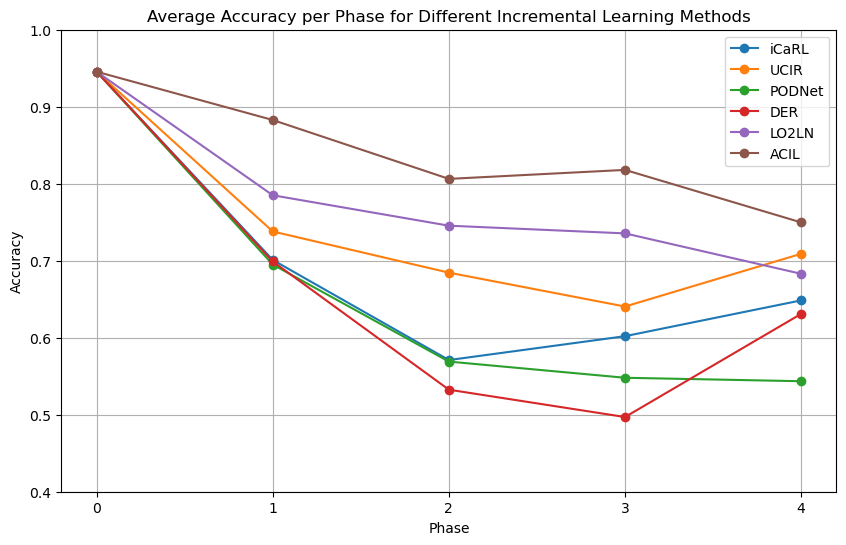

In [1]:
import matplotlib.pyplot as plt

# Data for plotting
methods = ['iCaRL', 'UCIR', 'PODNet', 'DER', 'LO2LN', 'ACIL']
phases = [1, 2, 3, 4]
accuracies_first = {
    'iCaRL': [0.605, 0.495, 0.545, 0.725],
    'UCIR': [0.658, 0.608, 0.608, 0.749],
    'PODNet': [0.671, 0.583, 0.546, 0.584],
    'DER': [0.590, 0.434, 0.442, 0.716],
    'LO2LN': [0.752, 0.712, 0.707, 0.637],
    'ACIL': [0.87825, 0.82753, 0.79579, 0.73713]
}

# Updated data for plotting with an additional Phase 0
accuracy_phase0_first = 0.985
accuracy_phase0_second = 0.906

# Averaging the phase 0 accuracies
accuracy_phase0_avg = (accuracy_phase0_first + accuracy_phase0_second) / 2

accuracies_second = {
    'iCaRL': [0.797, 0.647, 0.659, 0.572],
    'UCIR': [0.818, 0.761, 0.673, 0.669],
    'PODNet': [0.719, 0.555, 0.550, 0.503],
    'DER': [0.808, 0.631, 0.552, 0.546],
    'LO2LN': [0.818, 0.779, 0.764, 0.729],
    'ACIL': [0.88725, 0.78505, 0.84011, 0.76236]
}

# Averaging the accuracies for each phase
accuracies_avg = {}
for method in methods:
    accuracies_avg[method] = [accuracy_phase0_avg] + [
        (accuracies_first[method][i] + accuracies_second[method][i]) / 2
        for i in range(len(phases))
    ]

# Phases including Phase 0
phases_with_phase0 = [0] + phases

# Plotting the averaged data with Phase 0
plt.figure(figsize=(10, 6))

for method in accuracies_avg:
    plt.plot(phases_with_phase0, accuracies_avg[method], marker='o', label=method)

plt.title('Average Accuracy per Phase for Different Incremental Learning Methods')
plt.xlabel('Phase')
plt.ylabel('Accuracy')
plt.ylim(0.4, 1)
plt.xticks(phases_with_phase0)
plt.legend()
plt.grid(True)
plt.show()


In [2]:
from typing import Optional
import torch
from torch import nn
from torch import Tensor
import torch.nn.functional as F
import numpy as np
from models.utils import *
class CNNEncoder(nn.Module):
    """
    Modified from  https://github.com/emadeldeen24/AdaTime/blob/adatime_v2/models/models.py
    """
    def __init__(self, input_channels, feature_dims, norm='BN', dropout=0, hidden_dims=64, depth=3):
        super(CNNEncoder, self).__init__()

        self.feature_dims = feature_dims
        self.stacks = nn.ModuleList()
        self.in_channels = [2**(i-1) * hidden_dims if i != 0 else input_channels for i in range(depth)]

        for i in range(depth):
            if i == 0:
                stack = CNNEncoder.convStack(self.in_channels[i], hidden_dims, norm, dropout)
            elif i == depth-1:
                stack = CNNEncoder.convStack(self.in_channels[i], feature_dims, norm, dropout)
            else:
                stack = CNNEncoder.convStack(self.in_channels[i], 2 * self.in_channels[i], norm, dropout)
            self.stacks.append(stack)

    @staticmethod
    def convStack(in_channels, out_channel, norm, dropout):
        NormLayer = get_norm_layer(norm)
        stack = nn.Sequential(
            nn.Conv1d(in_channels, out_channel, kernel_size=5, stride=1, padding=2),
            nn.ReLU(),
            NormLayer(out_channel),  # Input: (N, C, L)
            nn.MaxPool1d(kernel_size=2, stride=2),  # After each stack, the length will be halved.
            nn.Dropout(dropout),
        )

        return stack

    def forward(self,  x, pooling=True):
        # Input x is (N, L_in, C_in), need to transform it to (N, C_in, L_in)
        x = x.transpose(1, 2)

        for stack in self.stacks:
            x = stack(x)

        if pooling:
            return x.mean(dim=-1)  # global average pooling, (N, C_out)
        else:
            return x


/data/yt/envs/tscl/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [10]:
#创建一个CNNEncoder实例
encoder = CNNEncoder(input_channels=45, feature_dims=128, norm='BN', dropout=0.1, hidden_dims=64, depth=4)
print(encoder)
# 创建一个随机输入张量
x = torch.randn(32, 125, 45)
# 通过编码器前向传播
output = encoder(x)
print(f"Output shape: {output.shape}")

CNNEncoder(
  (stacks): ModuleList(
    (0): Sequential(
      (0): Conv1d(45, 64, kernel_size=(5,), stride=(1,), padding=(2,))
      (1): ReLU()
      (2): BatchNorm1d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (3): MaxPool1d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
      (4): Dropout(p=0.1, inplace=False)
    )
    (1): Sequential(
      (0): Conv1d(64, 128, kernel_size=(5,), stride=(1,), padding=(2,))
      (1): ReLU()
      (2): BatchNorm1d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (3): MaxPool1d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
      (4): Dropout(p=0.1, inplace=False)
    )
    (2): Sequential(
      (0): Conv1d(128, 256, kernel_size=(5,), stride=(1,), padding=(2,))
      (1): ReLU()
      (2): BatchNorm1d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (3): MaxPool1d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    